<h1 align="center"> Principlal Component Analysis </h1>
<h3 align="center"> IST 5520, 2021 Fall </h3>
<h3 align="center"> Group 7 </h3>

In [22]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [23]:
pitchingdat = pd.read_csv(r"Multicollinearity_Removal_Pitching.csv", index_col = 0)
hittingdat = pd.read_csv(r"Multicollinearity_Removal_Hitting.csv", index_col = 0)

<h1 align="center"> Normailze data before doing PCA </h1>

In [24]:
pitchingnorm = scale(pitchingdat.loc[:,'yearID':'LogSalary'])
hittingnorm = scale(hittingdat.loc[:,'yearID':'LogSalary'])

pitching_corr = pd.DataFrame(pitchingnorm).describe().transpose()
pitching_corr

,count,mean,std,min,25%,50%,75%,max
0,5503.0,9.668443e-15,1.000091,-1.640313,-0.896297,0.095723,0.839738,1.583753
1,5503.0,-2.582383e-18,1.000091,-0.764392,-0.764392,-0.764392,0.941984,2.027859
2,5503.0,3.873575e-17,1.000091,-0.357607,-0.357607,-0.357607,-0.357607,11.803639
3,5503.0,-2.840622e-17,1.000091,-0.293937,-0.293937,-0.293937,-0.293937,12.982693
4,5503.0,2.195026e-17,1.000091,-0.335457,-0.335457,-0.335457,-0.219348,6.863307
5,5503.0,-1.032953e-17,1.000091,-1.277552,-0.747497,-0.384030,0.782093,2.781160
6,5503.0,7.230673e-17,1.000091,-1.167523,-0.800492,-0.311117,0.667632,4.460286
7,5503.0,6.197720e-17,1.000091,-1.375342,-0.765693,-0.249837,0.594292,4.205287
8,5503.0,-8.263626e-17,1.000091,-1.244577,-0.750731,-0.256886,0.511319,4.260888
9,5503.0,-3.925222e-16,1.000091,-4.351648,-0.476195,-0.062151,0.401578,8.897763


In [26]:
hitting_corr = pd.DataFrame(hittingnorm).describe().transpose()
hitting_corr

,count,mean,std,min,25%,50%,75%,max
0,5373.0,1.337243e-14,1.000093,-1.571616,-0.831754,-0.091892,0.894591,1.634453
1,5373.0,1.110843e-16,1.000093,-1.468272,-0.885174,-0.107710,0.766937,3.164118
2,5373.0,-7.934592e-17,1.000093,-1.391244,-0.848488,-0.146098,0.683999,3.589340
3,5373.0,-5.554215e-17,1.000093,-0.643605,-0.643605,-0.424316,0.123909,7.908701
4,5373.0,8.463565e-17,1.000093,-1.616305,-0.817169,-0.117926,0.706183,3.952672
5,5373.0,0.000000e+00,1.000093,-0.612681,-0.612681,-0.376633,0.095465,27.713184
6,5373.0,3.173837e-17,1.000093,-0.635943,-0.635943,-0.264256,0.107432,8.284550
7,5373.0,-3.438323e-17,1.000093,-1.133355,-0.720086,-0.306817,0.519720,5.065676
8,5373.0,-3.702810e-17,1.000093,-1.331118,-0.820229,-0.139045,0.542139,4.118357
9,5373.0,7.617209e-16,1.000093,-4.709223,-0.400737,0.126940,0.586664,14.073085


<h1 align="center"> Principal Component Analysis for Pitching </h1>

In [27]:
# Selecting Number of Components and fitting the PCA model for Pitching

pitchingPCA = PCA(n_components = 18)
pitchingPCA.fit(pitchingnorm)

PCA(n_components=18)

In [28]:
#The amount of variance that each PC explains

pitchingvar = pitchingPCA.explained_variance_ratio_

print(pitchingvar)

[0.43153099 0.10872301 0.07267512 0.05862232 0.05685596 0.04646408
 0.0428496  0.03219407 0.028242   0.02769304 0.02230389 0.02071778
 0.0149272  0.01290433 0.00999551 0.00699367 0.00457728 0.00173015]


In [29]:
#Cumulative Variance Explains for Pitching

pitchingvar1 = np.cumsum(np.round(pitchingPCA.explained_variance_ratio_, decimals = 4)*100)

print(pitchingvar1)

[43.15 54.02 61.29 67.15 72.84 77.49 81.77 84.99 87.81 90.58 92.81 94.88
 96.37 97.66 98.66 99.36 99.82 99.99]


Drawing a Scree Plot for both Pitching and Hitting to show the cumulative variance explained along the number of principal components

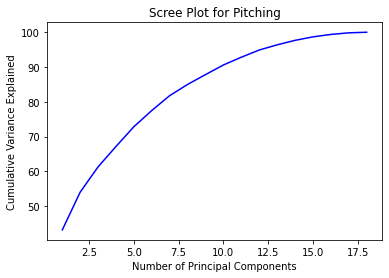

In [32]:
pitchingvar1 = pd.DataFrame(pitchingvar1, index=np.arange(1,19))
plt.plot(pitchingvar1,color='blue')
plt.title('Scree Plot for Pitching')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

From the above plot, we can see if we choose a 10-component solution, the explained variance would be > 90%. 

In [39]:
pitchingPCA11 = PCA(n_components = 10)
pitchingPCA11.fit(pitchingnorm)
data_pitchingPCA11 = pitchingPCA11.transform(pitchingnorm)

pd.DataFrame(pitchingPCA11.components_.transpose(),
            index = pitchingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,11)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
yearID,-0.032059,-0.179879,0.070432,0.683152,-0.582365,0.060158,0.103310,-0.319918,0.035531,0.060734
GS,0.335430,0.098082,-0.007945,0.087079,-0.057510,-0.065262,-0.072484,-0.046474,-0.011485,0.020103
CG,0.222165,-0.001882,0.592801,-0.123691,-0.005756,-0.044305,0.133334,0.014078,-0.065751,-0.037857
SHO,0.185842,-0.016216,0.653585,-0.139715,-0.046748,-0.042919,0.210557,-0.024839,-0.002970,-0.040900
SV,-0.057823,-0.338162,-0.043675,0.189639,0.650100,0.138027,0.447518,-0.416374,-0.060557,-0.008648
H,0.345448,0.068543,-0.050188,0.037759,0.022958,-0.018900,-0.060445,-0.114911,-0.010595,-0.027830
HR,0.310222,0.096697,-0.092428,0.075071,0.028704,-0.062107,-0.098726,-0.119432,-0.126946,-0.030937
BB,0.319700,0.009240,-0.208482,-0.024521,-0.002740,0.000613,0.109144,0.034196,0.054558,0.033345
SO,0.320603,-0.133180,-0.003232,0.076065,-0.032807,0.081684,0.115486,-0.035695,0.040921,0.032766
BAOpp,-0.036494,0.612714,0.049245,0.156817,0.103185,0.252665,0.012898,-0.081977,0.054253,-0.041101


<h1 align="center"> Principal Component Analysis for Hitting </h1>

In [33]:
# Selecting Number of Components and fitting the PCA model for Hitting

hittingPCA = PCA(n_components = 12)
hittingPCA.fit(hittingnorm)

PCA(n_components=12)

In [34]:
#The amount of variance that each PC explains

hittingvar = hittingPCA.explained_variance_ratio_

print(hittingvar)

[0.43823134 0.1255481  0.09769304 0.07633407 0.06210274 0.05732521
 0.04912046 0.0375884  0.03351924 0.01180716 0.00624365 0.00448659]


In [35]:
#Cumulative Variance Explains for Hitting

hittingvar1 = np.cumsum(np.round(hittingPCA.explained_variance_ratio_, decimals = 4)*100)

print(hittingvar1)

[43.82 56.37 66.14 73.77 79.98 85.71 90.62 94.38 97.73 98.91 99.53 99.98]


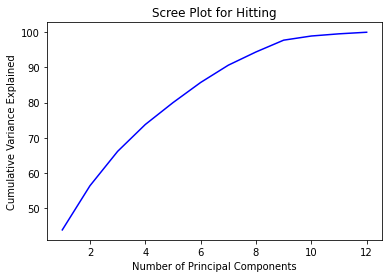

In [37]:
hittingvar1 = pd.DataFrame(hittingvar1, index=np.arange(1,13))
plt.plot(hittingvar1,color='blue')
plt.title('Scree Plot for Hitting')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

From the above plot, we can see that if we choose a 7-component solution, the explained variance would be > 90%.

In [40]:
hittingPCA8 = PCA(n_components = 7)
hittingPCA8.fit(hittingnorm)
data_hittingPCA8 = hittingPCA8.transform(hittingnorm)

pd.DataFrame(hittingPCA8.components_.transpose(),
            index = hittingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,8)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
yearID,-0.017919,-0.117548,-0.718768,0.568385,-0.001604,-0.062439,0.322427
R,0.404014,0.155902,-0.090016,-0.068651,-0.063118,0.087214,-0.120324
RBI,0.409430,-0.080819,-0.059863,-0.139808,-0.153176,-0.023753,-0.053202
SB,0.163396,0.582754,-0.177994,0.094927,0.136725,0.420821,-0.371017
SO,0.337051,0.058819,-0.308313,-0.010017,-0.335465,0.063943,-0.154527
IBB,0.254480,-0.253148,0.102854,-0.161078,0.007358,0.689177,0.568414
SH,0.012745,0.672243,0.008402,-0.142396,0.252838,-0.190056,0.560317
SF,0.319089,-0.028341,-0.103126,-0.295643,-0.096775,-0.308346,-0.002272
GIDP,0.326053,-0.090390,-0.082639,-0.220443,0.016234,-0.408956,0.188036
BA,0.299938,0.087819,0.413094,0.517043,0.079371,-0.182338,0.076104
